In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
from geoplot import geoplot as gplt
%matplotlib inline

In [ ]:
# This keeps blowing up the kernel on my Air?
# census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')
# from random import randint
# census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

# gplt.choropleth(census_tracts, hue='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5)

In [8]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [9]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [5]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

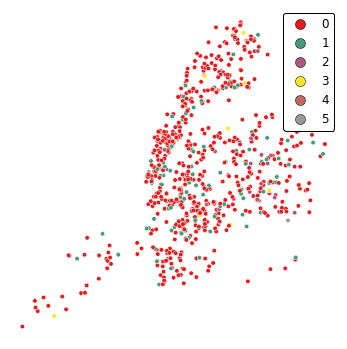

In [6]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea(), edgecolor='white', color='steelblue', linewidth=0.5,
               hue='NUMBER OF PERSONS INJURED', categorical=True, legend=True)

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(182)aggplot()
-> patches = _squarify(df, (minx, maxx, miny, maxy), cutoff)
(Pdb) c
-74.1142267 -73.7280965 40.5794763 40.8787451
-74.1142267 -73.9211616 40.7291107 40.8787451
-74.01769415 -73.9211616 40.8039279 40.8787451
-74.01769415 -73.9211616 40.7291107 40.8039279
-74.01769415 -73.969427875 40.7291107 40.7665193
-73.9935610125 -73.969427875 40.747815 40.7665193
-73.969427875 -73.9211616 40.7665193 40.8039279
-73.969427875 -73.9452947375 40.7665193 40.7852236
-74.1142267 -73.9211616 40.5794763 40.7291107
-74.01769415 -73.9211616 40.6542935 40.7291107
-74.01769415 -73.9211616 40.5794763 40.6542935
-73.969427875 -73.9211616 40.6168849 40.6542935
-73.9211616 -73.7280965 40.7291107 40.8787451
-73.9211616 -73.82462905 40.8039279 40.8787451
-73.9211616 -73.82462905 40.7291107 40.8039279
-73.9211616 -73.7280965 40.5794763 40.7291107
-73.82462905 -73.7280965 40.6542935 40.7291107


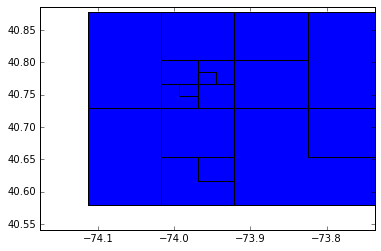

In [55]:
gplt.aggplot(cc.sample(100), cutoff=5)

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(68)pointplot()
-> if extent:
(Pdb) c


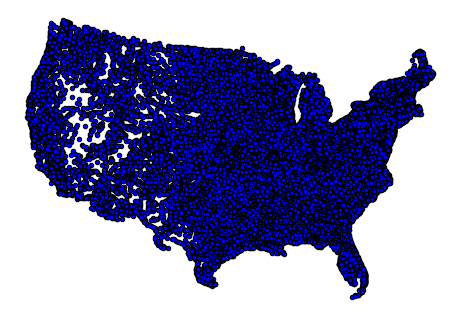

In [159]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

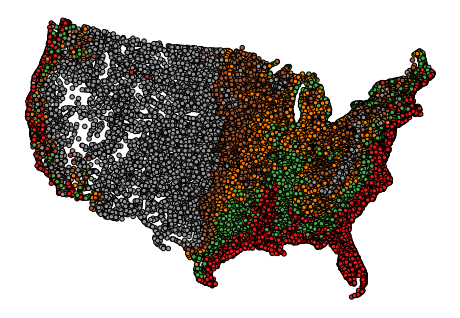

In [10]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT')

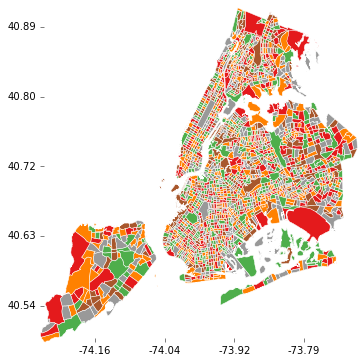

In [37]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, scheme='QUANTILES')

In [40]:
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

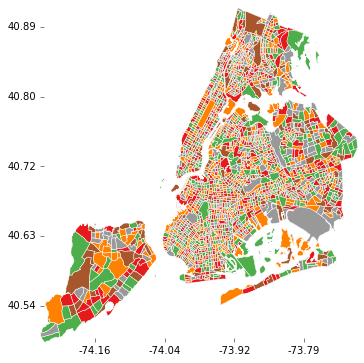

In [42]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True)

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(144)choropleth()
-> categories = np.unique(data)
(Pdb) c
> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(171)choropleth()
-> patches = []
(Pdb) c


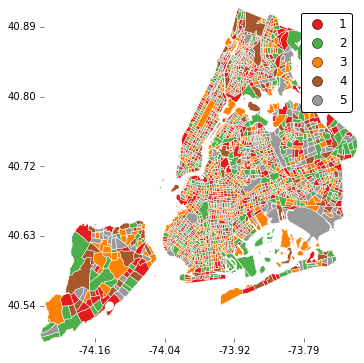

In [53]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

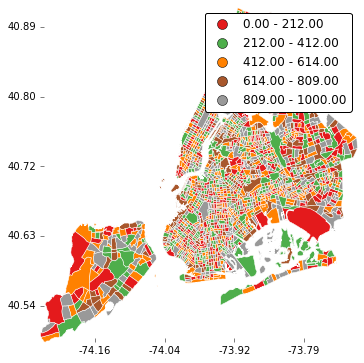

In [65]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

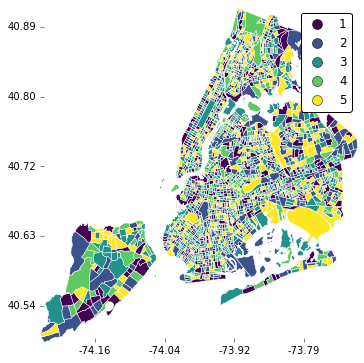

In [71]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True, categorical=True, cmap='viridis')

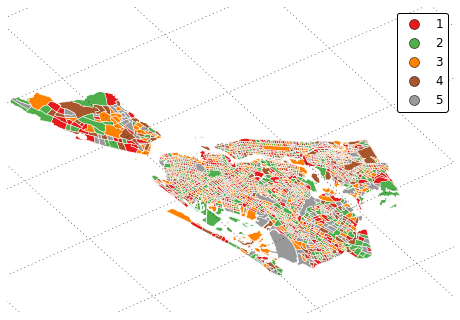

In [179]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.Gnomonic(), edgecolor='white', linewidth=0.5,
                legend=True, categorical=True, gridlines=True)